### Hypothesis Testing

# Loaded Dice

Tommy seems to be winning a lot of games recently. You are, in fact, *highly suspicious* of his treasured dice. So you've been recording the result of every role, and they are in `loaded_500.txt`. 

Let's try and answer the simplest question we can: Is *Tommy* rolling too many sixes?

Let's answer the question rigorously.

1. Visualise the data. Make sure we understand it.
2. Reduce or quantify the data
3. Pose our hypothesis (and visualise)
4. Calculate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data =np.loadtxt('loaded_500.txt')

### Visualising

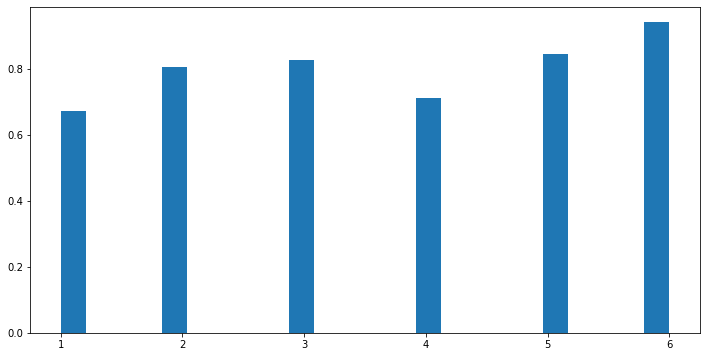

In [9]:
unique,counts=np.unique(data,return_counts=True)
plt.rcParams['figure.figsize'] = [12, 6]
plt.hist(data,density=True,bins=24);

### Reduce or quantify data

We don't need each individual roll. We really just want the total number of sixes rolled and the total number of rolls.

In [11]:
num_sixes=(data==6).sum()
num_total=data.size

### Pose our Hypothesis

We have two outcomes when we roll a dice. We roll a six, or we roll something else. With a fair die (our null hypothesis), $p(6) = \frac{1}{6}$. As this is discrete with two options, we are looking at the *binomial* distribution.

What is the chance we roll 98 *or more* sixes with a fair die?

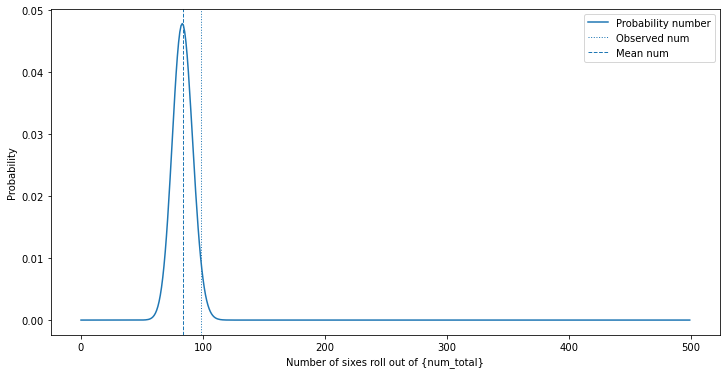

In [12]:
#p(6) =1/6 in normal die, What is the probability we roll 98 or more sixes?
from scipy.stats import binom
n=np.arange(num_total)
prob_n=binom.pmf(n,num_total,1/6)
# Here the distribution is discrete as represented by binomial distribution thereforeit has pmf.
plt.plot(n,prob_n,label='Probability number')
plt.axvline(num_sixes,linestyle=':',lw=1,label='Observed num')
plt.axvline(num_total/6,linestyle='--',lw=1,label='Mean num')
plt.xlabel('Number of sixes roll out of {num_total}')
plt.ylabel('Probability')
plt.legend();


Only 3.7% of the time with a fair dice you'd roll this many or more sixes


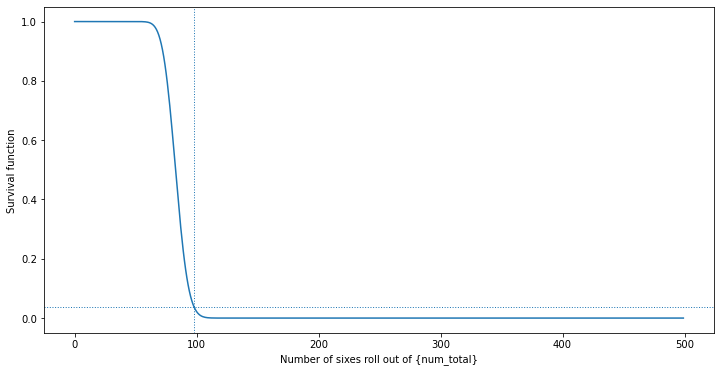

In [13]:
#The binomial distribution of data
d = binom(num_total,1/6)
sf=d.sf(num_sixes)
plt.plot(n,d.sf(n))
plt.axhline(sf,linestyle=':',lw=1)
plt.xlabel('Number of sixes roll out of {num_total}')
plt.axvline(num_sixes,linestyle=':',lw=1,label='Observed num')
plt.ylabel('Survival function')
print(f"Only {sf*100:0.1f}% of the time with a fair dice you'd roll this many or more sixes")